In [ ]:
#!pip3 install keras
#!pip install ann_visualizer
#!pip install graphviz

In [ ]:
# acquire MNIST data
from tensorflow.keras.datasets import mnist

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# reshape data for an MLP input
import numpy as np

import tensorflow as tf
np.random.seed(42)


train_images = np.reshape(train_images, (-1, 784))
test_images = np.reshape(test_images, (-1, 784))

# normalize data
train_images = train_images.astype('float32') / 255
test_images = test_images.astype('float32') / 255

# convert labels to a one-hot vector
from tensorflow.keras.utils import to_categorical

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

11490434/11490434 [==============================] - 1s 0us/step


In [ ]:
# define network architecture
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import InputLayer
from tensorflow.keras.layers import Dense

MLP = Sequential()
MLP.add(InputLayer(input_shape=(784, ))) # layer de entrada
MLP.add(Dense(256, activation='relu')) # layer oculto 1
MLP.add(Dense(256, activation='relu')) # layer oculto 2
MLP.add(Dense(10, activation='softmax')) # saida

# summary
MLP.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 256)               200960    
                                                                 
 dense_1 (Dense)             (None, 256)               65792     
                                                                 
 dense_2 (Dense)             (None, 10)                2570      
                                                                 
Total params: 269,322
Trainable params: 269,322
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# optimization
MLP.compile(loss='categorical_crossentropy',
            optimizer='adam',
            metrics=['accuracy'])

In [ ]:
# train (fit) // alterei algumas vezes os valores para ver a diferença na accuracy
MLP.fit(train_images, train_labels, 
        epochs=50, batch_size=64)

Epoch 1/50
938/938 [==============================] - 9s 3ms/step - loss: 0.2244 - accuracy: 0.9336
Epoch 2/50
938/938 [==============================] - 3s 3ms/step - loss: 0.0860 - accuracy: 0.9738
Epoch 3/50
938/938 [==============================] - 4s 4ms/step - loss: 0.0581 - accuracy: 0.9818
Epoch 4/50
938/938 [==============================] - 4s 4ms/step - loss: 0.0415 - accuracy: 0.9867
Epoch 5/50
938/938 [==============================] - 7s 7ms/step - loss: 0.0313 - accuracy: 0.9897
Epoch 6/50
938/938 [==============================] - 6s 7ms/step - loss: 0.0274 - accuracy: 0.9904
Epoch 7/50
938/938 [==============================] - 4s 4ms/step - loss: 0.0228 - accuracy: 0.9924
Epoch 8/50
938/938 [==============================] - 4s 4ms/step - loss: 0.0155 - accuracy: 0.9952
Epoch 9/50
938/938 [==============================] - 3s 3ms/step - loss: 0.0160 - accuracy: 0.9951
Epoch 10/50
938/938 [==============================] - 4s 4ms/step - loss: 0.0154 - accuracy: 0.9949

In [ ]:
# evaluate performance
test_loss, test_acc = MLP.evaluate(test_images, test_labels,
                                   batch_size=128,
                                   verbose=0)
print("Test loss:", test_loss)
print("Test accuracy:", (test_acc*100),"%")

Test loss: 0.17613498866558075
Test accuracy: 98.07999730110168 %


array([[0.05226317, 0.0246617 , 0.03561208, 0.05624901, 0.05789937,
        0.3543851 , 0.06407189, 0.05196501, 0.24804279, 0.05484995]],
      dtype=float32)

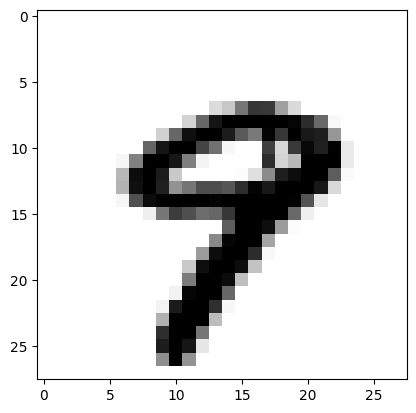

In [ ]:
# make a prediction
import matplotlib.pyplot as plt

digit = test_images[9]
digit = np.reshape(digit, (28, 28)) #foi necessario redimensionar
plt.imshow(digit, cmap="binary")

digit = np.reshape(digit, (-1, 784))
digit = digit.astype('float32') / 255

MLP.predict(digit, verbose=0)

In [ ]:
print(MLP.predict(digit, verbose=0))

np.argmax(MLP.predict(digit, verbose=0))


[[0.05226317 0.0246617  0.03561208 0.05624901 0.05789937 0.3543851
  0.06407189 0.05196501 0.24804279 0.05484995]]


5

In [ ]:
!pip install tensorflow

In [ ]:
from sklearn.model_selection import GridSearchCV
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier

# Função para criar o modelo MLP
def create_model():
    model = Sequential()
    model.add(InputLayer(input_shape=(784, )))
    model.add(Dense(256, activation='relu'))
    model.add(Dense(256, activation='relu'))
    model.add(Dense(10, activation='softmax'))
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

# Crie um objeto KerasClassifier a partir da função do modelo
model = KerasClassifier(build_fn=create_model)

# Defina os parâmetros que você deseja otimizar
param_grid = {
    'epochs': [50, 100, 150],  # Valores diferentes para o número de épocas
    'batch_size': [32, 64, 128]  # Valores diferentes para o tamanho do batch
}

# Crie o objeto GridSearchCV
grid = GridSearchCV(estimator=model, param_grid=param_grid, cv=3)

# Execute o grid search nos dados de treinamento
grid_result = grid.fit(train_images, train_labels)

# Imprima os resultados
print("Melhores parâmetros encontrados: ", grid_result.best_params_)
print("Melhor acurácia encontrada: ", grid_result.best_score_)

# Avalie o modelo com os melhores parâmetros no conjunto de teste
test_loss, test_acc = grid_result.best_estimator_.model.evaluate(test_images, test_labels)
print("Test loss:", test_loss)
print("Test accuracy:", test_acc)


In [ ]:
print(MLP.predict(digit, verbose=0))

np.argmax(MLP.predict(digit, verbose=0))